In [9]:
url = '/content/drive/MyDrive/Colab Notebooks/TAREA_2_ECONOMETRIA_III/Index_modified.csv'
df_comp = pd.read_csv(url)


:# Punto número 8

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
from math import sqrt
import seaborn as sns
sns.set()

# Importación de los datos y preprocesamiento

raw_csv_data = pd.read_csv(url)
df_comp=raw_csv_data.copy()
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp['ftse']

# Si deseas eliminar algunas columnas, puedes hacerlo aquí
# del df_comp['spx']
# del df_comp['dax']
# del df_comp['ftse']
# del df_comp['nikkei']

size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]


In [ ]:
from scipy.stats.distributions import chi2

# Función para realizar el LLR Test
def LLR_test(mod_1, mod_2, DF=1):
    # Calcula la log-verosimilitud del primer modelo
    L1 = mod_1.llf
    # Calcula la log-verosimilitud del segundo modelo
    L2 = mod_2.llf
    # Calcula la estadística de prueba LR
    LR = 2 * (L2 - L1)
    # Calcula el valor p usando la distribución chi-cuadrado
    p = chi2.sf(LR, DF).round(3)
    return p


In [15]:
# Crear la columna 'returns' que contiene los retornos
df['returns'] = df['market_value'].pct_change(1) * 100


<ipython-input-15-75052db7078a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df['market_value'].pct_change(1) * 100


In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo ARIMA(1,1,1)
model_ar_1_i_1_ma_1 = ARIMA(df['market_value'], order=(1, 1, 1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()

# Muestra el resumen del modelo
print(results_ar_1_i_1_ma_1.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6210
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34071.791
Date:                Sun, 15 Oct 2023   AIC                          68149.582
Time:                        04:26:39   BIC                          68169.784
Sample:                    01-07-1994   HQIC                         68156.586
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8296      0.042     19.962      0.000       0.748       0.911
ma.L1         -0.8647      0.037    -23.344      0.000      -0.937      -0.792
sigma2      3419.0501     36.700     93.161      0.0

<ipython-input-17-d87e78ecd551>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid


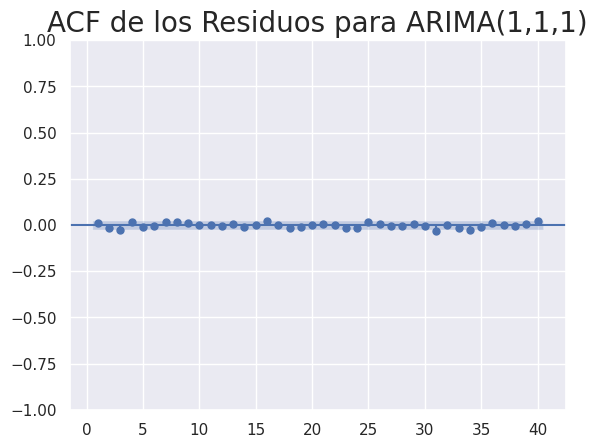

In [17]:
# Calcula los residuos del modelo ARIMA(1,1,1) y guárdalos en una nueva columna
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid

# Grafica la función de autocorrelación de los residuos
sgt.plot_acf(df['res_ar_1_i_1_ma_1'], zero=False, lags=40)
plt.title("ACF de los Residuos para ARIMA(1,1,1)", size=20)
plt.show()


<ipython-input-18-bfd1411dcacb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid


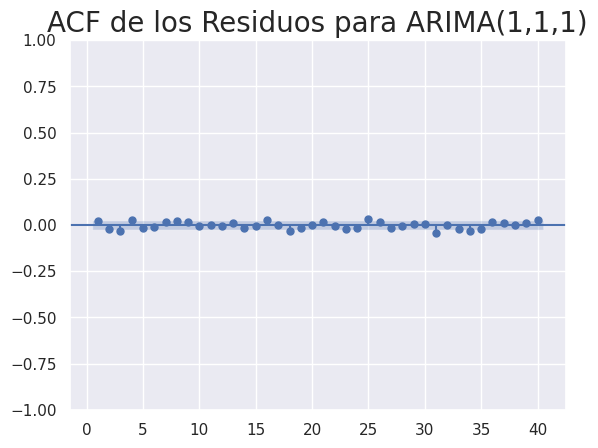

In [18]:
# Asigna los residuos del modelo ARIMA(1,1,1) a la columna 'res_ar_1_i_1_ma_1'
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid

# Grafica la función de autocorrelación de los residuos, excluyendo el primer valor
sgt.plot_acf(df['res_ar_1_i_1_ma_1'][1:], zero=False, lags=40)
plt.title("ACF de los Residuos para ARIMA(1,1,1)", size=20)
plt.show()


In [19]:
# Modelos ARIMA
model_ar_1_i_1_ma_2 = ARIMA(df['market_value'], order=(1, 1, 2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()

model_ar_1_i_1_ma_3 = ARIMA(df['market_value'], order=(1, 1, 3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()

model_ar_2_i_1_ma_1 = ARIMA(df['market_value'], order=(2, 1, 1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()

model_ar_3_i_1_ma_1 = ARIMA(df['market_value'], order=(3, 1, 1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()

model_ar_3_i_1_ma_2 = ARIMA(df['market_value'], order=(3, 1, 2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()

# Mostrar LL y AIC de los modelos
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1,1,1):  	 LL =  -34071.79123845036 	 AIC =  68149.58247690072
ARIMA(1,1,2):  	 LL =  -34067.82046075794 	 AIC =  68143.64092151588
ARIMA(1,1,3):  	 LL =  -34065.08662184229 	 AIC =  68140.17324368458
ARIMA(2,1,1):  	 LL =  -34067.665705335334 	 AIC =  68143.33141067067
ARIMA(3,1,1):  	 LL =  -34066.58774928696 	 AIC =  68143.17549857392
ARIMA(3,1,2):  	 LL =  -34064.99653966822 	 AIC =  68141.99307933643


In [20]:
# Función para realizar un LLR test
def LLR_test(mod_1, mod_2):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = 2 * (L2 - L1)
    p = chi2.sf(LR, 1).round(3)
    return p

# Realizar el LLR test y mostrar el p-valor
p_value = LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_3)
print("\nLLR test p-value = " + str(p_value))



LLR test p-value = 0.019


In [21]:
# Función para realizar un LLR test con DF específico
def LLR_test(mod_1, mod_2, DF):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = 2 * (L2 - L1)
    p = chi2.sf(LR, DF).round(3)
    return p

# Realizar el LLR test con DF específico y mostrar el p-valor
p_value = LLR_test(results_ar_1_i_1_ma_1, results_ar_1_i_1_ma_3, DF=2)
print("\nLLR test p-value = " + str(p_value))



LLR test p-value = 0.001


<ipython-input-22-8150ed304844>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid


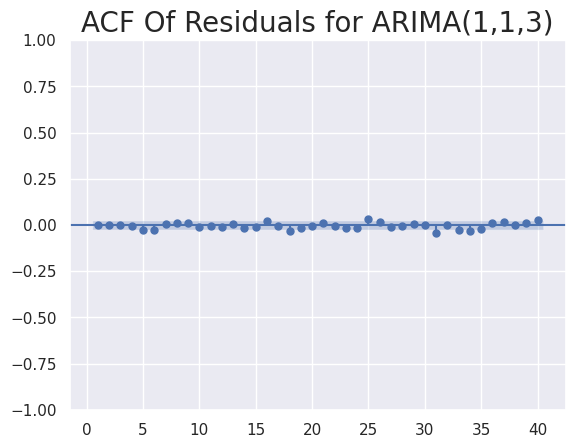

In [22]:
# Calcular los residuos del modelo ARIMA(1,1,3)
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid

# Trazar la función de autocorrelación (ACF) de los residuos
sgt.plot_acf(df['res_ar_1_i_1_ma_3'][1:], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size=20)
plt.show()


In [23]:
# Modelo ARIMA(5,1,1)
order_ar_5_i_1_ma_1 = (5, 1, 1)
model_ar_5_i_1_ma_1 = ARIMA(df['market_value'], order=order_ar_5_i_1_ma_1)
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_params=None)

# Modelo ARIMA(6,1,3)
order_ar_6_i_1_ma_3 = (6, 1, 3)
model_ar_6_i_1_ma_3 = ARIMA(df['market_value'], order=order_ar_6_i_1_ma_3)
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit(start_params=None)



In [24]:
print(results_ar_5_i_1_ma_1.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6210
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -34060.850
Date:                Sun, 15 Oct 2023   AIC                          68135.699
Time:                        04:27:12   BIC                          68182.836
Sample:                    01-07-1994   HQIC                         68152.040
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3620      0.160      2.256      0.024       0.047       0.677
ar.L2         -0.0455      0.009     -4.838      0.000      -0.064      -0.027
ar.L3         -0.0386      0.012     -3.233      0.0

In [25]:
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1):  \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t LL = ", results_ar_6_i_1_ma_3.llf, "\t AIC = ", results_ar_6_i_1_ma_3.aic)


ARIMA(1,1,3):  	 LL =  -34065.08662184229 	 AIC =  68140.17324368458
ARIMA(5,1,1):  	 LL =  -34060.849696710065 	 AIC =  68135.69939342013
ARIMA(6,1,3):  	 LL =  -34059.41775162746 	 AIC =  68138.83550325492


In [26]:
# Calcular el p-valor del LLR test
p_value = LLR_test(results_ar_1_i_1_ma_3, results_ar_6_i_1_ma_3, DF=5)
print("\nLLR test p-value = " + str(p_value))



LLR test p-value = 0.045


In [27]:
# Calcular el p-valor del LLR test
p_value = LLR_test(results_ar_5_i_1_ma_1, results_ar_6_i_1_ma_3, DF=3)
print("\nLLR test p-value = " + str(p_value))



LLR test p-value = 0.413


<ipython-input-28-eaf866ee8156>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid


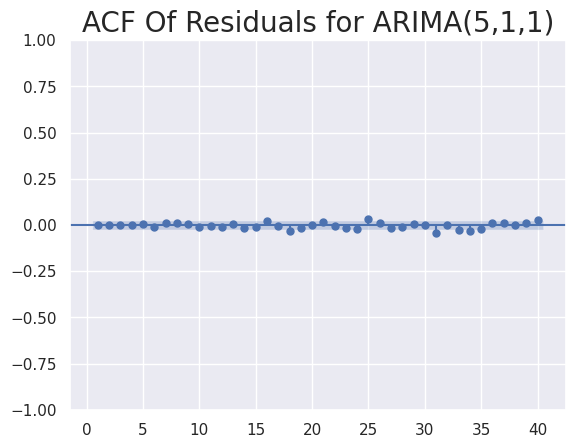

In [28]:
# Calcular los residuos del modelo ARIMA(5,1,1)
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid

# Trazar la ACF de los residuos
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(5,1,1)", size=20)
plt.show()


In [ ]:
# Calcular las diferencias de primer orden
df['delta_prices'] = df.market_value.diff(1)

# Modelo ARIMA(1,0,1) para las diferencias
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()

# Mostrar el resumen del modelo
print(results_delta_ar_1_i_1_ma_1.summary())


                               SARIMAX Results                                
Dep. Variable:           delta_prices   No. Observations:                 6199
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -34019.961
Date:                Sat, 14 Oct 2023   AIC                          68047.922
Time:                        08:50:25   BIC                          68074.851
Sample:                    01-10-1994   HQIC                         68057.258
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6606      0.657      1.006      0.315      -0.627       1.948
ar.L1          0.8348      0.040     20.675      0.000       0.756       0.914
ma.L1         -0.8696      0.036    -24.087      0.0

In [ ]:
# Realizar la prueba de Dickey-Fuller aumentada en la serie de diferencias de primer orden
adf_result = sts.adfuller(df.delta_prices[1:])
print(adf_result)


(-35.43397970574891, 0.0, 5, 6193, {'1%': -3.431406355974594, '5%': -2.8620068149070077, '10%': -2.5670184827348006}, 67672.58722872188)


In [ ]:
# Modelo ARIMA(1,2,1)
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()

# Mostrar el resumen del modelo
print(results_ar_1_i_2_ma_1.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -34031.431
Date:                Sat, 14 Oct 2023   AIC                          68068.862
Time:                        08:51:28   BIC                          68089.058
Sample:                    01-07-1994   HQIC                         68075.864
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0090      0.009     -1.019      0.308      -0.026       0.008
ma.L1         -1.0000      0.010    -97.775      0.000      -1.020      -0.980
sigma2      3436.3307     49.437     69.510      0.0

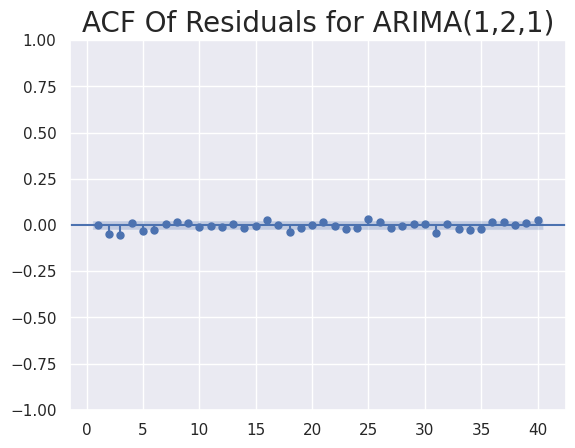

In [ ]:
# Calcular los residuos del modelo ARIMA(1,2,1)
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]

# Trazar la ACF de los residuos
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)", size=20)
plt.show()


In [ ]:
# Modelo ARIMAX(1,1,1) con variable exógena
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog=df.spx, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()

# Mostrar el resumen del modelo ARIMAX
print(results_ar_1_i_1_ma_1_Xspx.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -32878.082
Date:                Sat, 14 Oct 2023   AIC                          65764.163
Time:                        08:53:53   BIC                          65791.092
Sample:                    01-07-1994   HQIC                         65773.499
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.5914      0.031     83.357      0.000       2.530       2.652
ar.L1          0.2136      0.030      7.204      0.000       0.155       0.272
ma.L1         -0.4828      0.027    -18.128      0.0

In [ ]:
# Modelo SARIMAX con variable exógena
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax = SARIMAX(df.market_value, exog=df.spx, order=(1,0,1), seasonal_order=(2,0,1,5))
results_sarimax = model_sarimax.fit()

# Mostrar el resumen del modelo SARIMAX
print(results_sarimax.summary())


                                     SARIMAX Results                                     
Dep. Variable:                      market_value   No. Observations:                 6200
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -32893.959
Date:                           Sat, 14 Oct 2023   AIC                          65801.919
Time:                                   08:55:18   BIC                          65849.045
Sample:                               01-07-1994   HQIC                         65818.257
                                    - 10-12-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6028      0.031     84.307      0.000       2.542       2.663
ar.L1          0.9998      0.000   3050.981

# **Nueva** **sección**